# Hyperparameter Tuning

In [134]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, SMOTEN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, classification_report, confusion_matrix

In [135]:
# Loading the dataset
data = pd.read_csv("pima-indians-diabetes.csv")
data

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [136]:
# Check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   1. Number of times pregnant                                                  768 non-null    int64  
 1   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   3. Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   4. Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   5. 2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   6. Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   7. Diabetes pedigree function              

In [137]:
# Checking for duplicates
data.duplicated().sum()

0

In [138]:
# Renaming the columns
new_cols = [
    'pregnancy_frequency',
    'plasma_glucose_concentration',
    'diastolic_blood_pressure',
    'triceps_skin_fold_thickness',
    'hour_serum_insulin',
    'bmi',
    'diabetes_pedigree_function',
    'age',
    'diabetes_status'
]
data.columns = new_cols
data

,pregnancy_frequency,plasma_glucose_concentration,diastolic_blood_pressure,triceps_skin_fold_thickness,hour_serum_insulin,bmi,diabetes_pedigree_function,age,diabetes_status
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [139]:
# Checking for class imbalance
data["diabetes_status"].value_counts()

0    500
1    268
Name: diabetes_status, dtype: int64

In [140]:
# Separate fetures from target variable
X = data.drop("diabetes_status", axis = 1)
y = data["diabetes_status"]

In [141]:
# Divide dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

# Checking shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [142]:
y_train.value_counts()

0    401
1    213
Name: diabetes_status, dtype: int64

In [143]:
# Rectify Class Imbalance

#Instantiate SMOTEN
ss = SMOTEN(random_state = 42)
X_train_smoten, y_train_smoten = ss.fit_resample(X_train, y_train)

# Checking whether smoten has worked
print(f"Original Values \n{y_train.value_counts()}")
print("*****" *10)
print(f"SMOTEN values \n{y_train_smoten.value_counts()}")

Original Values 
0    401
1    213
Name: diabetes_status, dtype: int64
**************************************************
SMOTEN values 
0    401
1    401
Name: diabetes_status, dtype: int64


In [144]:
# Instantiate the model
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [145]:
# Checking the score of the model
rf.score(X_train, y_train)

1.0

In [146]:
# Making predictions using the model
y_pred = rf.predict(X_test)

In [147]:
# Checking Accuracy
acc = accuracy_score(y_test, y_pred) * 100
print(f"{acc:.2f}")

74.03


In [148]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[79, 20],
       [20, 35]], dtype=int64)

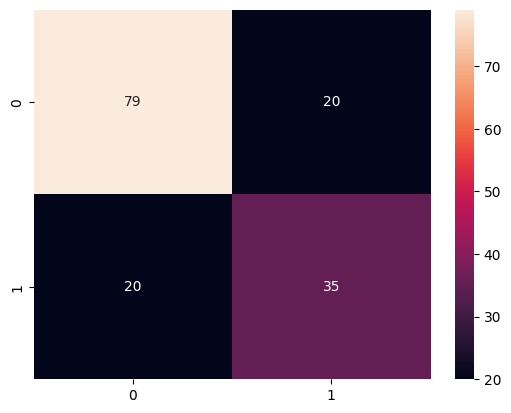

In [149]:
# Visualizing Confusion Matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".0f");

In [150]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



# Hyperparameter Tuning
We shall use `Grid Search` and `Random Search` to perform hyperparameter tuning

In [151]:
# Libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## GridSearch

In [152]:
param_grid = {'criterion': ["gini", "entropy"],
              'max_depth': [3,5,7,8, None],
              'min_samples_split': [2,5,8,10]
              }

# Instantiating GridSearch
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, scoring= "accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, None],
                         'min_samples_split': [2, 5, 8, 10]},
             scoring='accuracy')

In [153]:
# To get the best params
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 10}

In [154]:
# Use the best params on the Random Forest Classifier
# Instantiate the model
rf1 = RandomForestClassifier(criterion = "gini", max_depth = None, min_samples_split = 8)

# Train the model
rf1.fit(X_train, y_train)

# Check score
rf1.score(X_train, y_train)

0.9609120521172638

In [155]:
# Predictions
y_rf_pred = rf1.predict(X_test)

In [156]:
# Checking accuracy
acc_rf = accuracy_score(y_test, y_rf_pred)
acc_rf

0.7402597402597403

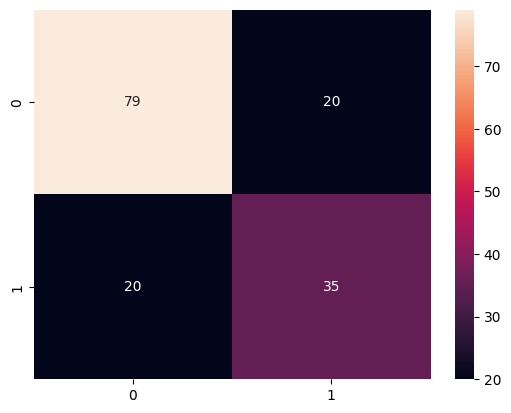

In [157]:
conf_matrix1 = confusion_matrix(y_test, y_rf_pred)

# Visualizing Confusion Matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".0f");

In [173]:
# Classification Report
class_report1 = classification_report(y_test, y_rf_pred)
print(class_report1)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



## RamdomizedSearch

In [158]:
from scipy.stats import randint

In [159]:
# Create param_distribution
param_dist = {'criterion': ["gini", "entropy"],
              'max_depth': randint(1, 10),
              'min_samples_split': randint(2,20)
              }

# Instantiate RandomSearch
random_search = RandomizedSearchCV(estimator = rf, param_distributions= param_dist, n_iter= 10,\
                                    cv = 5, scoring = "accuracy", random_state= 42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000228C0F4BCD0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000228C0F40D90>},
                   random_state=42, scoring='accuracy')

In [160]:
random_search.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 5}

In [161]:
# Use the best params on the Random Forest Classifier
# Instantiate the model
rf2 = RandomForestClassifier(criterion = "gini", max_depth = 8, min_samples_split = 8)

# Train the model
rf2.fit(X_train, y_train)

# Check score
rf2.score(X_train, y_train)

0.9332247557003257

In [162]:
# Predictions
y_rf2_pred = rf2.predict(X_test)

In [163]:
# Checking accuracy
acc_rf2 = accuracy_score(y_test, y_rf2_pred)
acc_rf2

0.7337662337662337

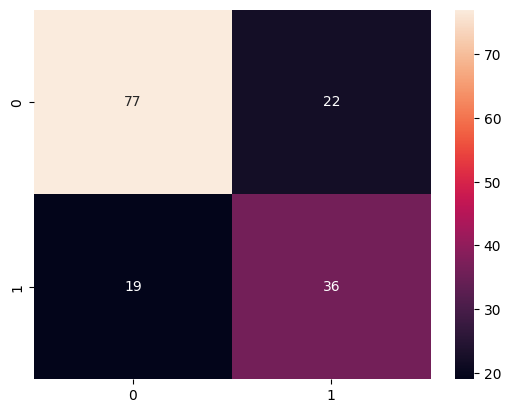

In [164]:
conf_matrix2 = confusion_matrix(y_test, y_rf2_pred)

# Visualizing Confusion Matrix
sns.heatmap(conf_matrix2, annot = True, fmt = ".0f");

In [172]:
# Classification Report
class_report2 = classification_report(y_test, y_rf2_pred)
print(class_report2)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



### ROC

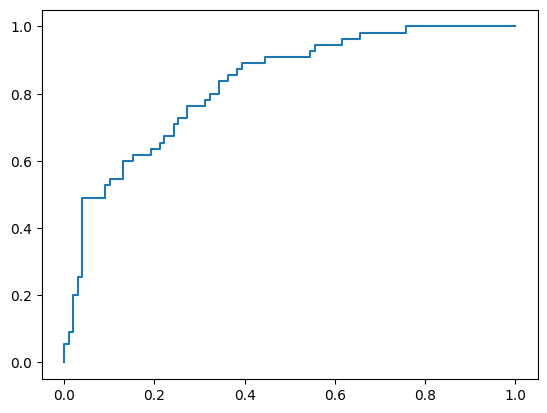

In [ ]:
y_pred_proba = rf2.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr);